In [4]:
import tensorflow as tf
import os
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Activation, Flatten
from tensorflow.keras.callbacks import TensorBoard
import pickle
import time

In [5]:
# Loading the data
mnist = tf.keras.datasets.mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Normalize
X_train = tf.keras.utils.normalize(X_train, axis=1)
X_test = tf.keras.utils.normalize(X_test, axis=1)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [6]:
# Reshape
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

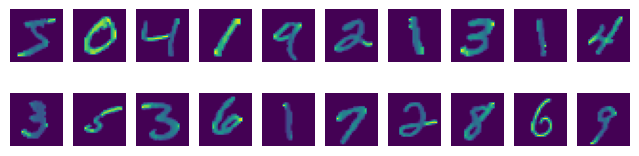

In [7]:

fig, axes = plt.subplots(2, 10, figsize=(8, 2))

for i in range(20):
    row = i // 10
    col = i % 10
    arr = axes[row, col]
    arr.imshow(X_train[i])
    arr.axis('off')

plt.show()

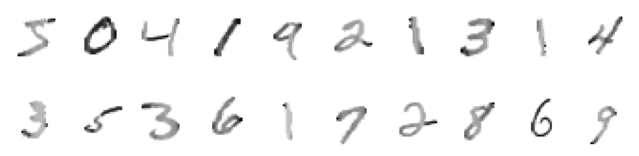

In [8]:

fig, axes = plt.subplots(2, 10, figsize=(8, 2))

for i in range(20):
    row = i // 10
    col = i % 10
    arr = axes[row, col]
    arr.imshow(X_train[i], cmap=plt.cm.binary)
    arr.axis('off')

plt.show()

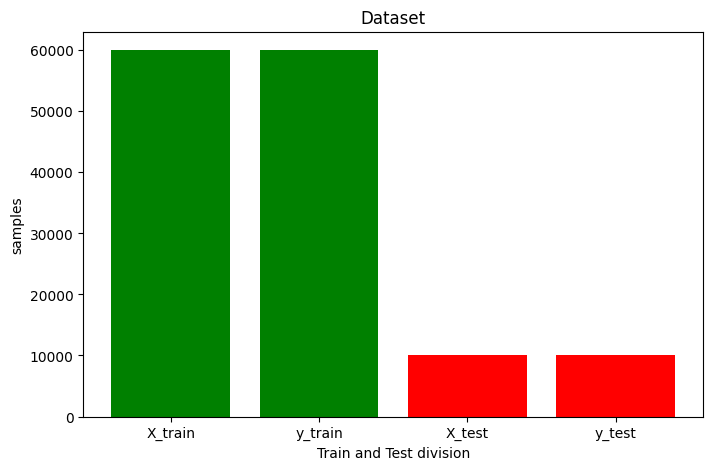

In [9]:

data = {
    "X_train": X_train.shape,
    "y_train": y_train.shape,
    "X_test": X_test.shape,
    "y_test": y_test.shape
}
colors = ['green' if 'train' in key else 'red' for key in data.keys()]
fig, arr = plt.subplots(figsize=(8, 5))
arr.bar(data.keys(), [shape[0] for shape in data.values()], color=colors)
arr.set_xlabel('Train and Test division')
arr.set_ylabel('samples')
arr.set_title('Dataset')

plt.show()


In [21]:
# Create the model
model = Sequential()

model.add(Conv2D(256, (3, 3), input_shape=(28,28, 1)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))



model.add(Conv2D(128, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dense(10))
model.add(Activation('softmax'))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.summary()


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_15 (Conv2D)                   │ (None, 26, 26, 256)         │           2,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_24 (Activation)           │ (None, 26, 26, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_15 (MaxPooling2D)      │ (None, 13, 13, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_16 (Conv2D)                   │ (None, 11, 11, 128)         │         295,040 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_25 (Activation)           │ (None, 11, 11, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_16 (MaxPooling2D)      │ (None, 5, 5, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_17 (Conv2D)                   │ (None, 3, 3, 64)            │          73,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_26 (Activation)           │ (None, 3, 3, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_17 (MaxPooling2D)      │ (None, 1, 1, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_5 (Flatten)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_27 (Activation)           │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 10)                  │             650 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_28 (Activation)           │ (None, 10)                  │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 376,202 (1.44 MB)

 Trainable params: 376,202 (1.44 MB)

 Non-trainable params: 0 (0.00 B)

In [22]:
history = model.fit(X_train, y_train, epochs=5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 417s 222ms/step - accuracy: 0.8524 - loss: 0.4555
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 437s 219ms/step - accuracy: 0.9760 - loss: 0.0763
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 403s 215ms/step - accuracy: 0.9846 - loss: 0.0489
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 435s 211ms/step - accuracy: 0.9884 - loss: 0.0366
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 445s 213ms/step - accuracy: 0.9909 - loss: 0.0276


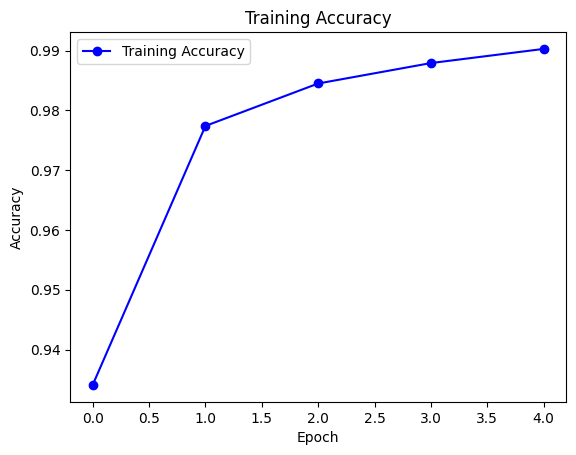

In [23]:

plt.plot(history.history['accuracy'], label='Training Accuracy', marker='o', markersize=6, color='blue')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training Accuracy')
plt.legend()


plt.show()

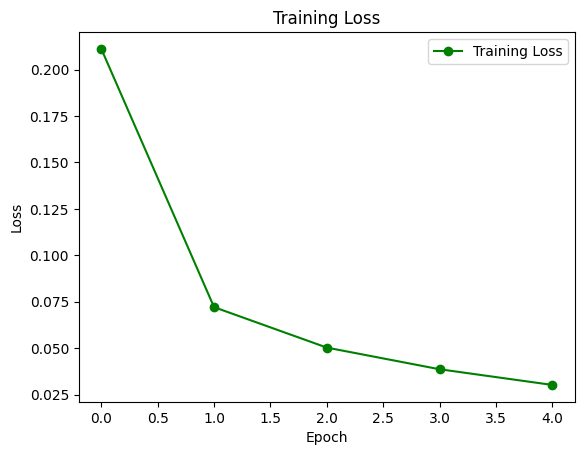

In [24]:
plt.plot(history.history['loss'], label='Training Loss', marker='o', markersize=6, color='green')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.legend()
plt.show()

In [25]:
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print(f"\nTest accuracy: {test_acc}")

313/313 - 16s - 51ms/step - accuracy: 0.9854 - loss: 0.0487

Test accuracy: 0.9854000210762024


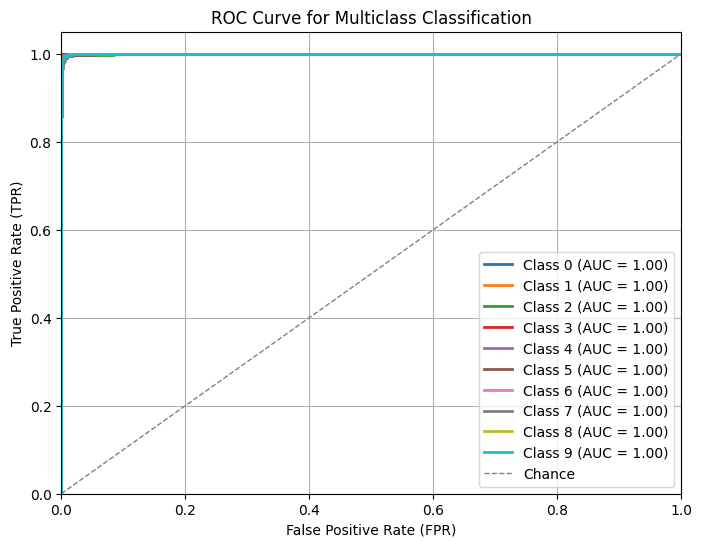

In [31]:

from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
n_class = y_probs.shape[1]
y_test_binarized = label_binarize(y_test, classes=np.arange(n_class))

fpr = {}
tpr = {}
roc_auc = {}

for i in range(n_class):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_probs[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure(figsize=(8, 6))
for i in range(n_class):
    plt.plot(fpr[i], tpr[i], lw=2, label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=1, label='Chance')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve for Multiclass Classification')
plt.legend(loc='lower right')
plt.grid()
plt.show()


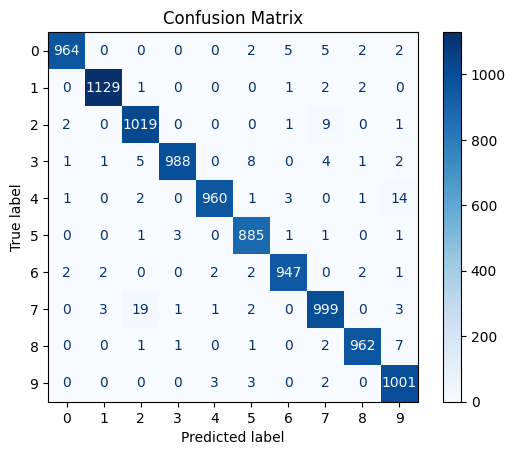

In [30]:

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
y_pred = np.argmax(y_probs, axis=1)
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y_test))
disp.plot(cmap=plt.cm.Blues, values_format='d')
plt.title("Confusion Matrix")
plt.show()
